# HEART DISEASE DIAGNOSTIC ANALYSIS

#### The Problem Statement:-
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.

Started on 10 August 2022

In [1]:
# Import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Extracting CSV Data From System using Pandas Library
Heart_Df = pd.read_csv('heart_disease_dataset.csv')

In [3]:
# Shape of dataset i.e. no of rows and columns
Heart_Df.shape

(303, 14)

In [4]:
# Finding out the null variables
Heart_Df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
#Statistics about the numerical columns in a dataset
Heart_Df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#Data Types of Columns
Heart_Df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

### Summary
----
`Age:All individual Ages are mentioned in years`
--
`Sex:All individual Sex are mentioned in 0&1(we have to change to M (i.e. 1)And F (i.e. 0))`
--
`Num: If Any individual have heart disease are mentioned in 0&1(we have to change to 1 as Disease And 0 as NoDisease )`
--
`chest-pain: which is indicated as cp  has 4 type values which are :- 1(typical angina),2(atypical angina),3(non-anginal pain),4(asymptomatic)`
--
`trestbps: All individual resting blood pressure (in mm Hg on admission to the hospital)`
--
`chol: All individual serum cholestoral in mg/dl`
--
`fasting blood sugar: which is mentioned as fbs( if any individual have fbs > 120 mg/dl then for 1 is true 0 is false)`
--
`resting electrocardiographic results : whihch is mentioned as restecg have 3 type of values which are ->0(normal),1(having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)),2(showing probable or definite left ventricular hypertrophy by Estes criteria)`
--
`thalach: Any individual maximum heart rate achieved`
--
`exang: exercise induced angina (1 = yes; 0 = no)`
--
`oldpeak = ST depression induced by exercise relative to rest`
--
`slope: the slope of the peak exercise ST segment1(upsloping),2(flat),3(downsloping)`
--
`ca: number of major vessels (0-3) colored by flourosopy`
--
`thalassemia : Any individual have blood related problem (As thal 3(normal),6(fixed defect),7(reversable defect))`
--
### There is no null values

In [7]:
#Getting top 10 records
Heart_Df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [8]:
#Getting bottom 10 records
Heart_Df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
293,63,1,4,140,187,0,2,144,1,4.0,1,2,7,1
294,63,0,4,124,197,0,0,136,1,0.0,2,0,3,1
295,41,1,2,120,157,0,0,182,0,0.0,1,0,3,0
296,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0


In [9]:
#Making copy of original data
Heart_Anlys_Df = Heart_Df.copy()

# Certain Change we will create
#### We will Change num in the dataset to something like Have-Disease and NotHave-Disease
#### We will Change sex in the dataset to something like Male and Female
#### We will Create Age-Group in the dataset to something like Young Adult,Middle-Aged and Senior 

In [10]:
#Function for Disease have or not
def modify_heartDis(col_name):
    if col_name == 1:
        return "Have-Disease"
    elif col_name == 0:
        return "NotHave-Disease"    

In [11]:
#Function for Sex Male and Female
def modify_genderCode(sc_name):
    if sc_name == 0:
        return "Female"
    elif sc_name ==1:
        return "Male"   

In [12]:
#Function for AgeGroup Young Adult upto(18to35),Middle-Aged(36to54) and Senior(55 above)
def create_agesection(data_select):
    if data_select>=18 and data_select<=35:
        return "Young-Adult"
    elif data_select>=36 and data_select<=54:
        return "Middle-Aged"
    elif data_select>=55:
        return "Senior"    

In [13]:
#Applying converted data into our dataset with new column - Heart Disease
Heart_Anlys_Df['Heart-Disease']=Heart_Anlys_Df['num'].apply(modify_heartDis)

In [14]:
#Applying converted data into our dataset with new column - Gender
Heart_Anlys_Df['Gender']=Heart_Anlys_Df['sex'].apply(modify_genderCode)

In [15]:
#Applying converted data into our dataset with new column - Age-Group
Heart_Anlys_Df['Age-Group']=Heart_Anlys_Df['age'].apply(create_agesection)

In [16]:
#Check new made columns
Heart_Anlys_Df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart-Disease,Gender,Age-Group
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,NotHave-Disease,Male,Senior
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Have-Disease,Male,Senior
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Have-Disease,Male,Senior
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,NotHave-Disease,Male,Middle-Aged
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,NotHave-Disease,Female,Middle-Aged
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,NotHave-Disease,Male,Senior
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,Have-Disease,Female,Senior
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,NotHave-Disease,Female,Senior
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,Have-Disease,Male,Senior
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,Have-Disease,Male,Middle-Aged


In [17]:
Heart_Anlys_Df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart-Disease,Gender,Age-Group
293,63,1,4,140,187,0,2,144,1,4.0,1,2,7,1,Have-Disease,Male,Senior
294,63,0,4,124,197,0,0,136,1,0.0,2,0,3,1,Have-Disease,Female,Senior
295,41,1,2,120,157,0,0,182,0,0.0,1,0,3,0,NotHave-Disease,Male,Middle-Aged
296,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1,Have-Disease,Male,Senior
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1,Have-Disease,Female,Senior
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Have-Disease,Male,Middle-Aged
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Have-Disease,Male,Senior
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Have-Disease,Male,Senior
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Have-Disease,Female,Senior
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0,NotHave-Disease,Male,Middle-Aged


In [18]:
# No of people have Disease
No_of_People=Heart_Anlys_Df.groupby('Heart-Disease')['num'].count()
No_of_People

Heart-Disease
Have-Disease       139
NotHave-Disease    164
Name: num, dtype: int64

In [19]:
# Gender Distribution in Dataset
Gender_Dis=Heart_Anlys_Df.groupby('Gender')['sex'].count()
Gender_Dis

Gender
Female     97
Male      206
Name: sex, dtype: int64

In [20]:
# Age Distribution in Dataset
Age_Sec=Heart_Anlys_Df.groupby('Age-Group')['age'].count()
Age_Sec

Age-Group
Middle-Aged    136
Senior         160
Young-Adult      7
Name: age, dtype: int64

In [21]:
# Let us see in Min and Max  Age in dataset
print("Min_Age:",Heart_Anlys_Df['age'].min())
print("Max_Age:",Heart_Anlys_Df['age'].max())

Min_Age: 29
Max_Age: 77


Resume On 12 August 2022

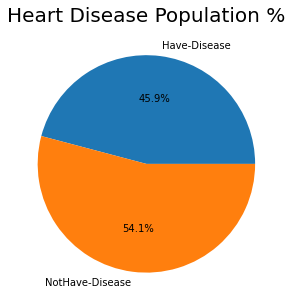

In [22]:
#Pie Chart Creation of Heart Disease Population 
plt.figure(figsize=(10,5))
plt.pie(No_of_People, labels=['Have-Disease','NotHave-Disease'], autopct='%1.1f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

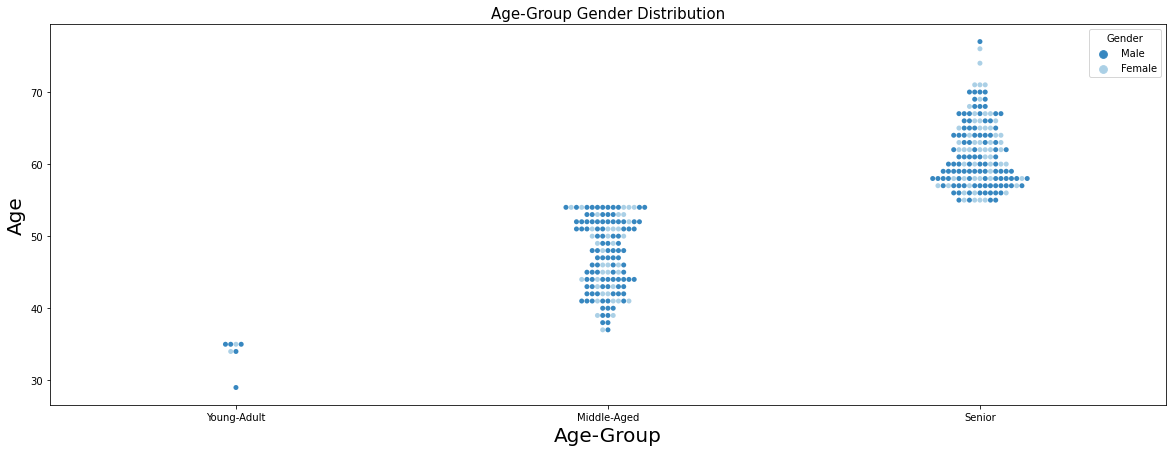

In [23]:
#Plot Age-Group Gender Distribution
plt.figure(figsize=(20,7))
sns.swarmplot(x='Age-Group', y='age', hue='Gender', data=Heart_Anlys_Df, order=['Young-Adult','Middle-Aged','Senior'], palette='Blues_r')
plt.title('Age-Group Gender Distribution', fontsize=15)
plt.xlabel('Age-Group', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.show()

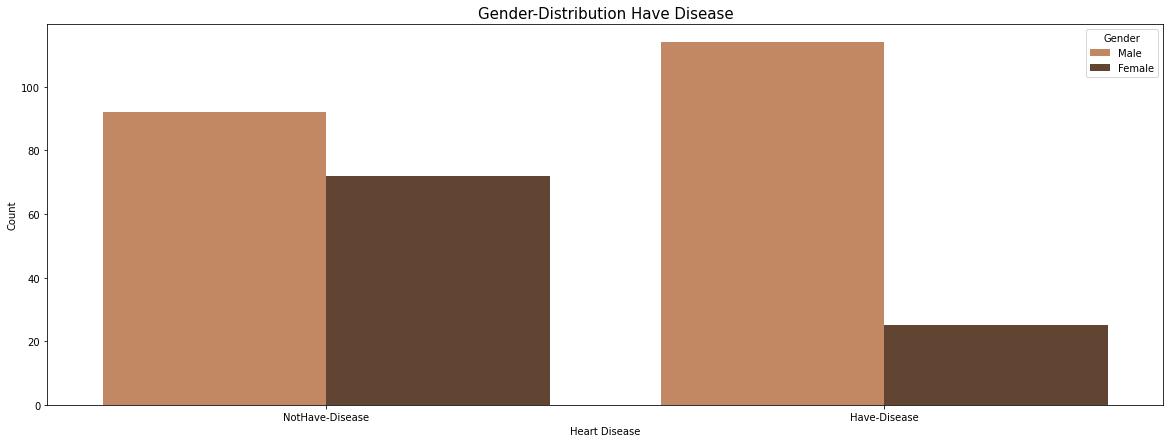

In [24]:
#Plot Gender Distribution Have Disease
plt.figure(figsize=(20,7))
sns.countplot(x=Heart_Anlys_Df['Heart-Disease'],hue='Gender', data=Heart_Anlys_Df, palette='copper_r')
plt.title('Gender-Distribution Have Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

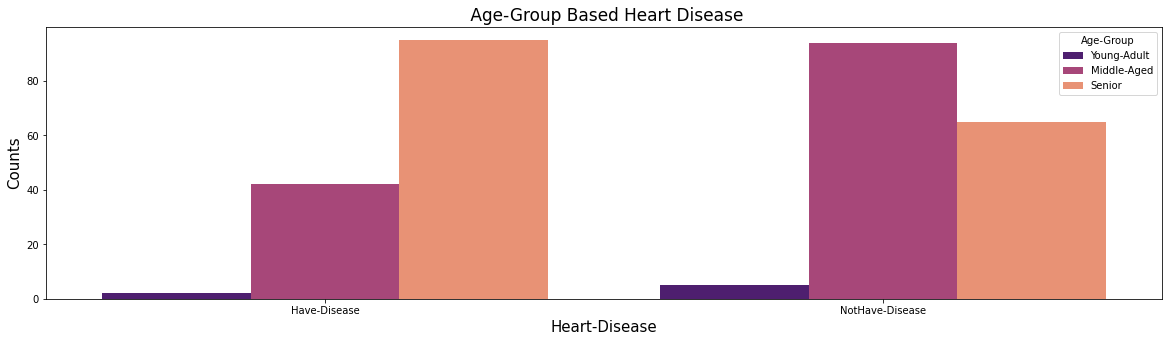

In [25]:
#Plot Creation of Heart Disease Based On Age-Group
plt.figure(figsize=(20,5))
hue_order=['Young-Adult', 'Middle-Aged', 'Senior']
sns.countplot(x='Heart-Disease', hue='Age-Group', data=Heart_Anlys_Df, order=['Have-Disease','NotHave-Disease'], hue_order=hue_order, palette='magma')
plt.title(' Age-Group Based Heart Disease', fontsize=17)
plt.xlabel('Heart-Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Resume on 15Aug 2022

#### Conclusion from Age-Group Gender Distribution,Gender Distribution Have Disease and Heart Disease Based On Age-Group
`In age-group gender distribution less no young-adult individual ,where as individual mostily are in age-group Senior then comes the middle-age also ratio of male is higher in comparision to female in each age group.`
---
`In gender -distribution of disease Number of individual who are Male have more chances of heart disease as compare to female.`
---
`In Age-group based heart disease we can see that individula belong to Senior age group have higher chances of having heart disease in comparision to the middle aged.`
---

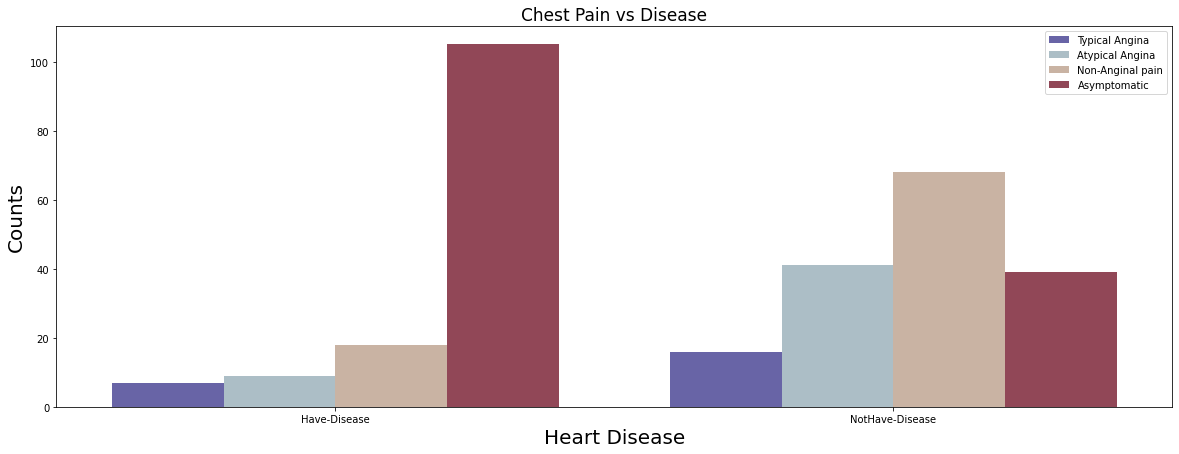

In [26]:
#Plot Creation of Chest Pain and Disease
plt.figure(figsize=(20,7))
sns.countplot(x=Heart_Anlys_Df['Heart-Disease'], hue='cp', data=Heart_Anlys_Df, order=['Have-Disease', 'NotHave-Disease'], palette='twilight_shifted')
plt.title('Chest Pain vs Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

#### In chest pain disease distribution people having Asymptomatic chest pain have heart disease in compare to other.

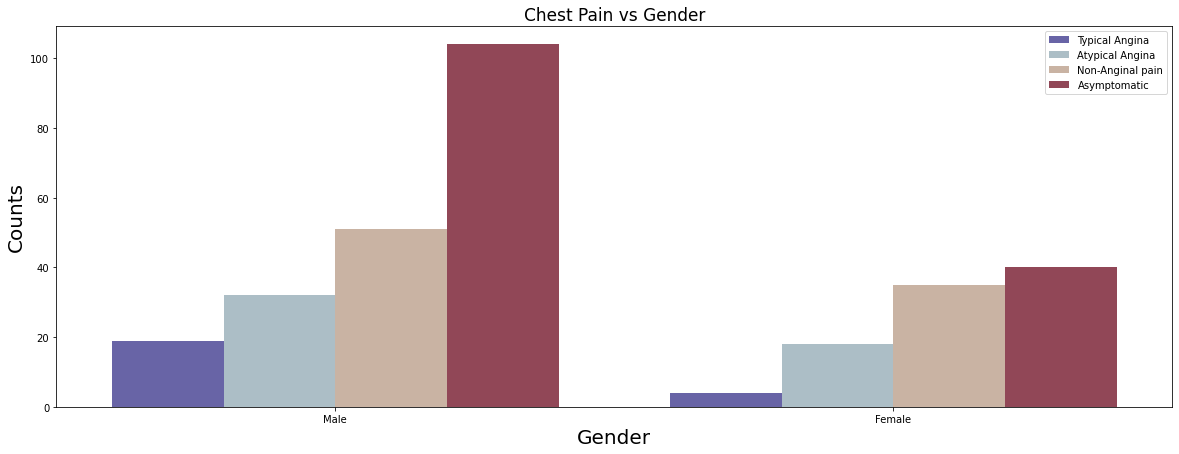

In [27]:
#Plot Creation of Chest Pain and Gender
plt.figure(figsize=(20,7))
sns.countplot(x=Heart_Anlys_Df['Gender'], hue='cp', data=Heart_Anlys_Df, palette='twilight_shifted')
plt.title('Chest Pain vs Gender', fontsize=17)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

#### In chest pain gender distribution male people having Asymptomatic chest pain more than female.

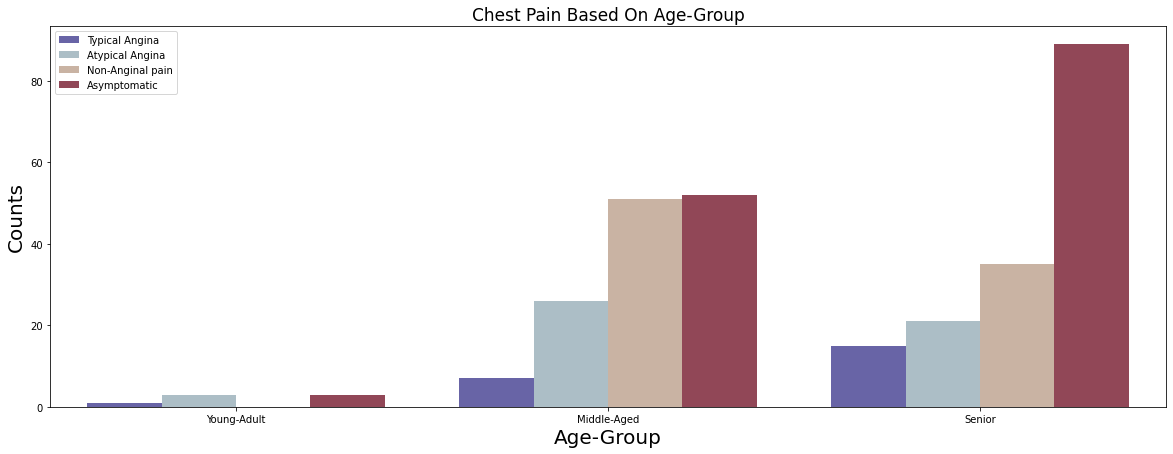

In [29]:
#Plot Creation of Chest Pain Based On Age-Group
plt.figure(figsize=(20,7))
sns.countplot(x=Heart_Anlys_Df['Age-Group'], hue='cp', data=Heart_Anlys_Df, order=['Young-Adult', 'Middle-Aged', 'Senior'], palette='twilight_shifted')
plt.title('Chest Pain Based On Age-Group', fontsize=17)
plt.xlabel('Age-Group', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

### From above graph we can see that individual from Senior age group experience more Asymptomatic(silent heart attack) than other age group individual. 

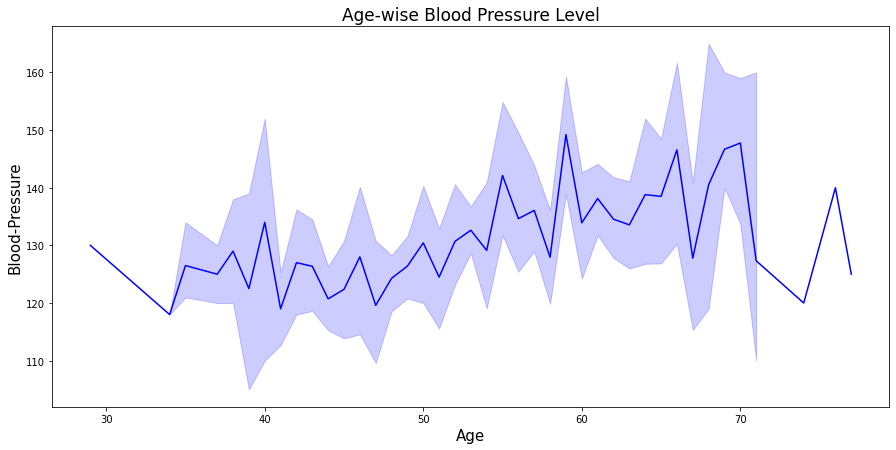

In [30]:
#Plot Creation of Blood Pressure according to Age
plt.figure(figsize=(15,7))
sns.lineplot(x='age', y='trestbps', data=Heart_Anlys_Df, color='b')
plt.title('Age-wise Blood Pressure Level', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood-Pressure', fontsize=15)
plt.show()

### From above graph we can see that individual from age 50-60 there is increase in blood-pressure level i.e. 130 to 150 then there was deep after age of 70.

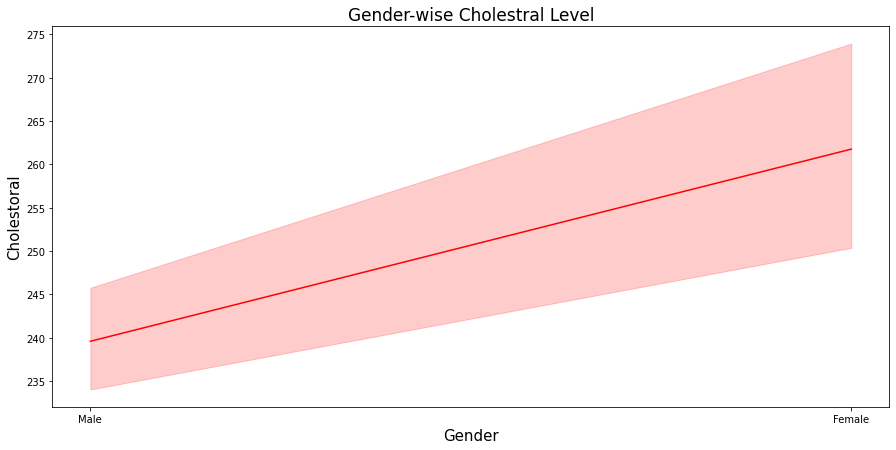

In [31]:
#Plot Creation of Cholestoral according to Gender
plt.figure(figsize=(15,7))
sns.lineplot(x='Gender', y='chol', data=Heart_Anlys_Df, color='r')
plt.title('Gender-wise Cholestral Level', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Cholestoral', fontsize=15)
plt.show()

### From above graph we can see that  female individual have higher cholestoral than male individual.

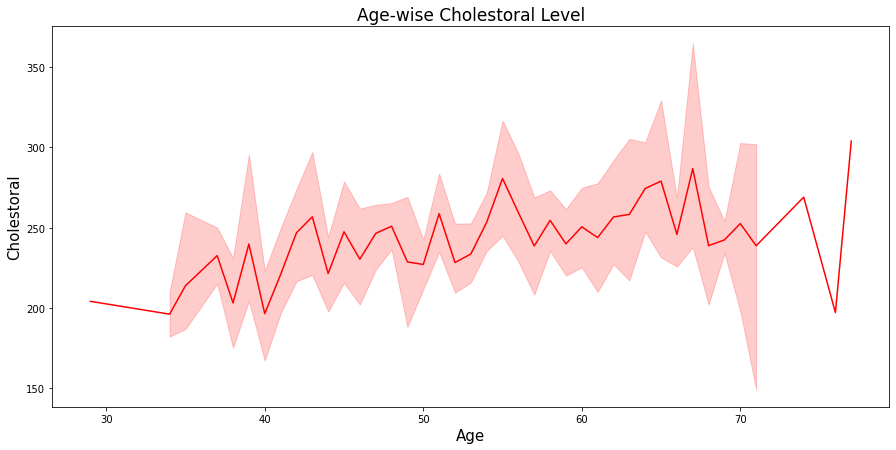

In [32]:
#Plot Creation of Cholestoral according to age
plt.figure(figsize=(15,7))
sns.lineplot(x='age', y='chol', data=Heart_Anlys_Df, color='r')
plt.title('Age-wise Cholestoral Level', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestoral', fontsize=15)
plt.show()

### From above graph we can see that  there was increase in Cholestoral from age 50 till 70 .

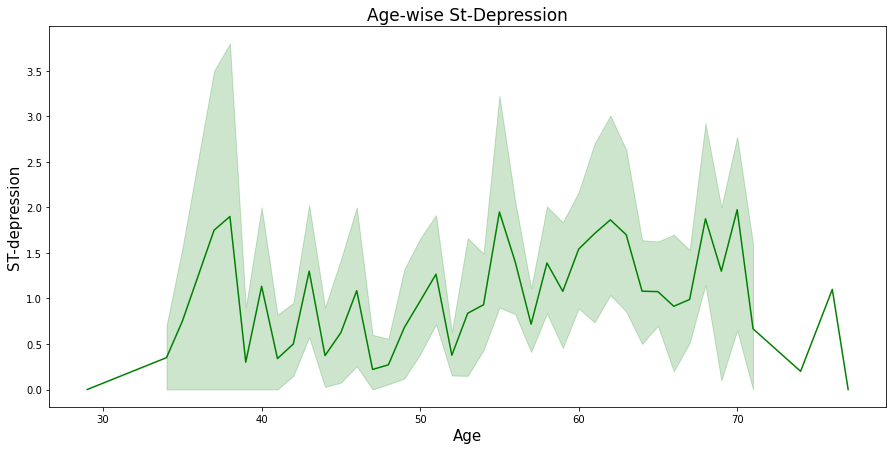

In [33]:
#Plot Creation of St-Depression according to age
plt.figure(figsize=(15,7))
sns.lineplot(x='age', y='oldpeak', data=Heart_Anlys_Df, color='g')
plt.title('Age-wise St-Depression', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST-depression', fontsize=15)
plt.show()

### From above graph we can see that there was increase in ST-Depression from age 30 till 40 and some peak happening in age 55.

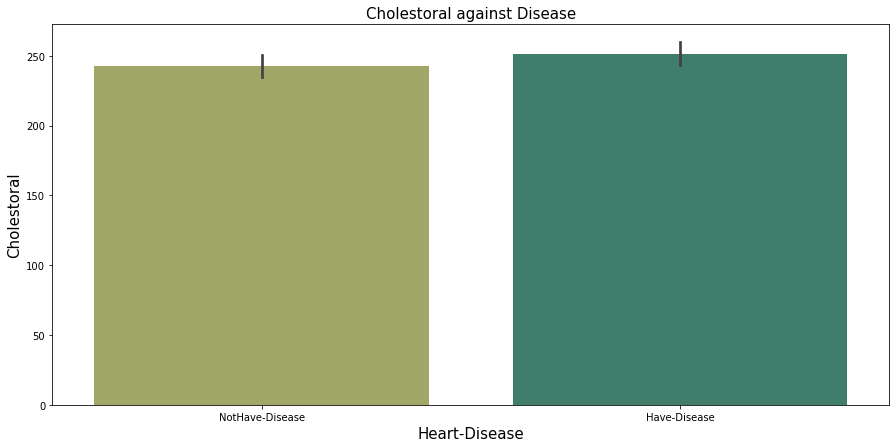

In [34]:
#Plot Creation of Cholestoral against Disease
plt.figure(figsize=(15,7))
sns.barplot( x='Heart-Disease',y='chol', data=Heart_Anlys_Df, palette='gist_earth_r')
plt.title('Cholestoral against Disease', fontsize=15)
plt.xlabel('Heart-Disease', fontsize=15)
plt.ylabel('Cholestoral', fontsize=15)
plt.show()

### From above we can conclude  Higher Cholestrol Level results Chances Of Heart Disease

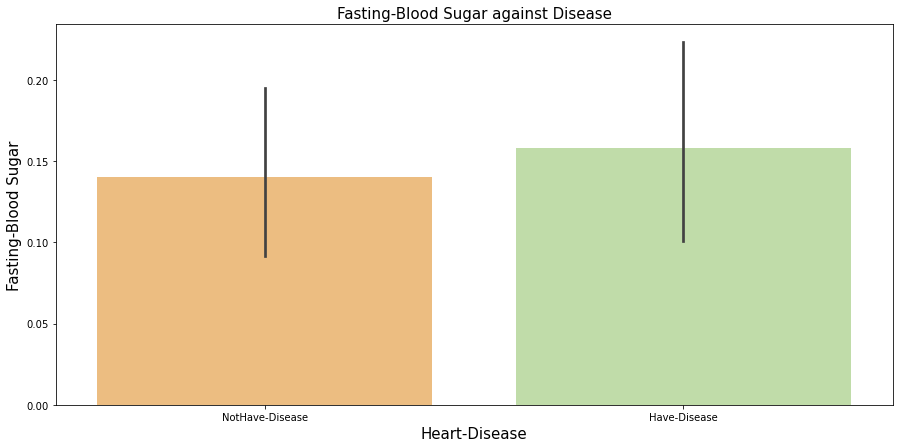

In [35]:
#Plot Creation of Fasting-Blood Sugar against Disease
plt.figure(figsize=(15,7))
sns.barplot( x='Heart-Disease',y='fbs', data=Heart_Anlys_Df, palette='Spectral')
plt.title('Fasting-Blood Sugar against Disease', fontsize=15)
plt.xlabel('Heart-Disease', fontsize=15)
plt.ylabel('Fasting-Blood Sugar', fontsize=15)
plt.show()

### From above we can conclude  Higher Fasting Blood Sugar Level results Chances Of Heart Disease

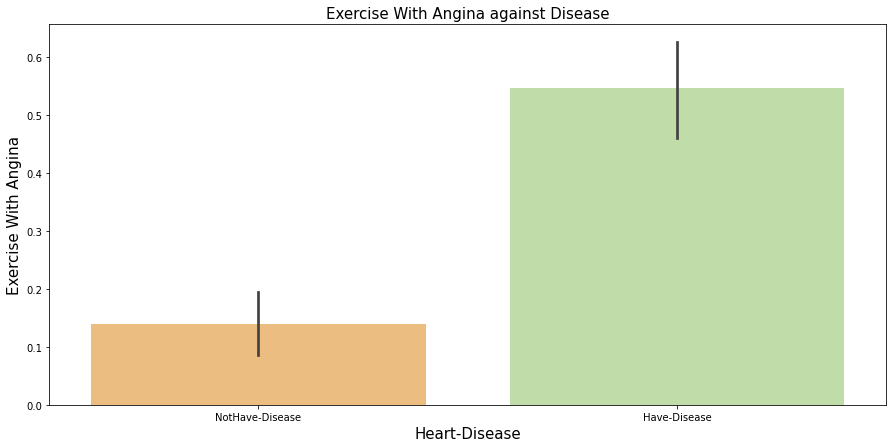

In [36]:
#Plot Creation of Exercise With Angina against Disease
plt.figure(figsize=(15,7))
sns.barplot( x='Heart-Disease',y='exang', data=Heart_Anlys_Df, palette='Spectral')
plt.title('Exercise With Angina against Disease', fontsize=15)
plt.xlabel('Heart-Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

### From above we can conclude by any chance you suffer from Angina, you must do lite exercise not heavy or long minutes excerise other-wise it can worse the situation.

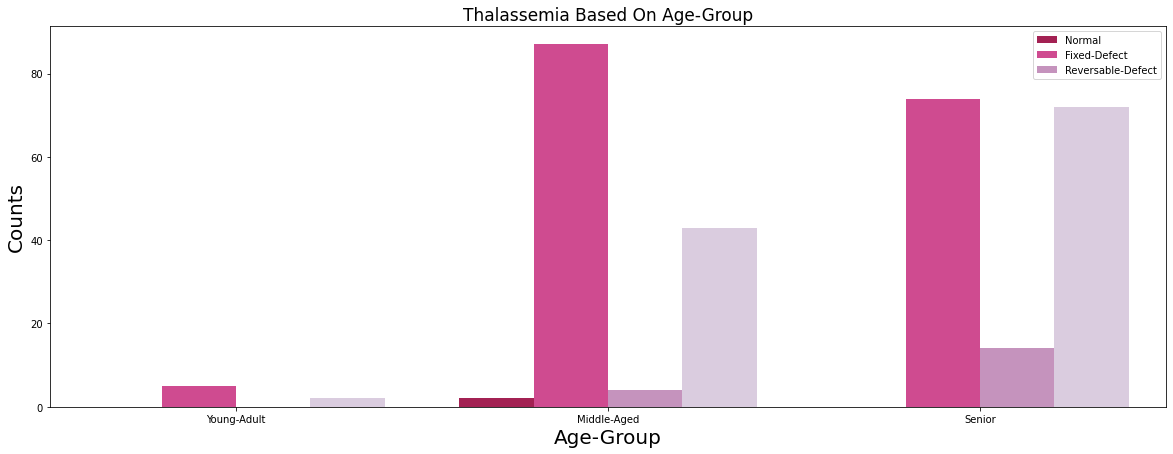

In [38]:
#Plot Creation of Thalassemia Based On Age-Group
plt.figure(figsize=(20,7))
sns.countplot(x=Heart_Anlys_Df['Age-Group'], hue='thal', data=Heart_Anlys_Df, order=['Young-Adult', 'Middle-Aged', 'Senior'], palette='PuRd_r')
plt.title('Thalassemia Based On Age-Group', fontsize=17)
plt.xlabel('Age-Group', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.legend(labels=['Normal','Fixed-Defect','Reversable-Defect'])
plt.show()

### From above we can conclude that those individual in senior age have higher reversable-defect are mostily affected then in middle-aged  as it must have been passed done via gene.

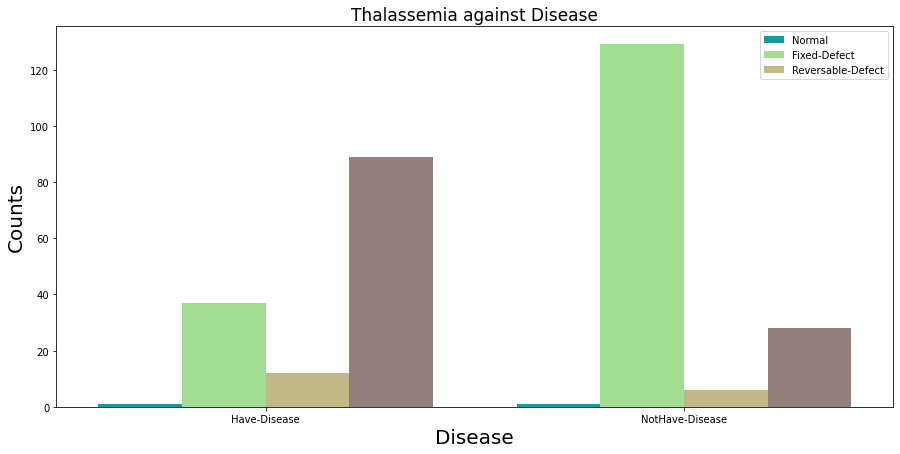

In [39]:
#Plot Creation of Thalassemia against Disease
plt.figure(figsize=(15,7))
sns.countplot(x='Heart-Disease', hue='thal', data=Heart_Anlys_Df, order=['Have-Disease', 'NotHave-Disease'], palette='terrain')
plt.title('Thalassemia against Disease', fontsize=17)
plt.xlabel('Disease', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.legend(labels=['Normal','Fixed-Defect','Reversable-Defect'])
plt.show()

### From above we can conclude that those individual have higher reversable-defect are more prone to disease then other.

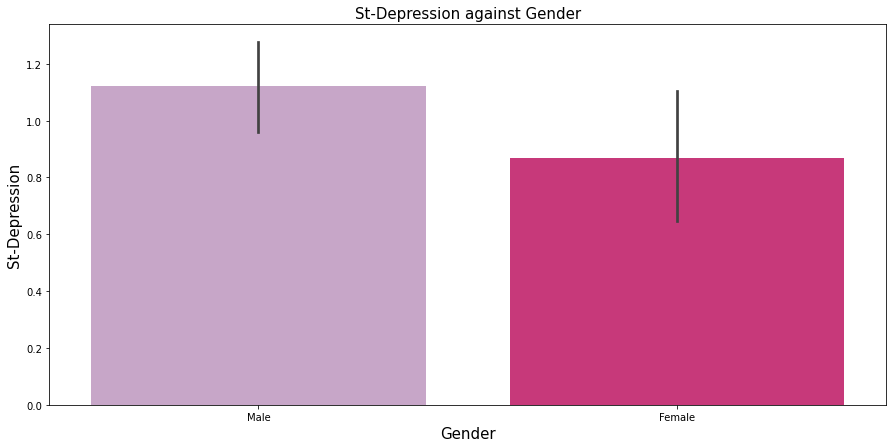

In [40]:
#Plot Creation of St-Depression against Gender
plt.figure(figsize=(15,7))
sns.barplot( x='Gender',y='oldpeak', data=Heart_Anlys_Df, palette='PuRd')
plt.title('St-Depression against Gender', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('St-Depression', fontsize=15)
plt.show()

### From above we can conclude that  Males are prone to ST depression as compare to females

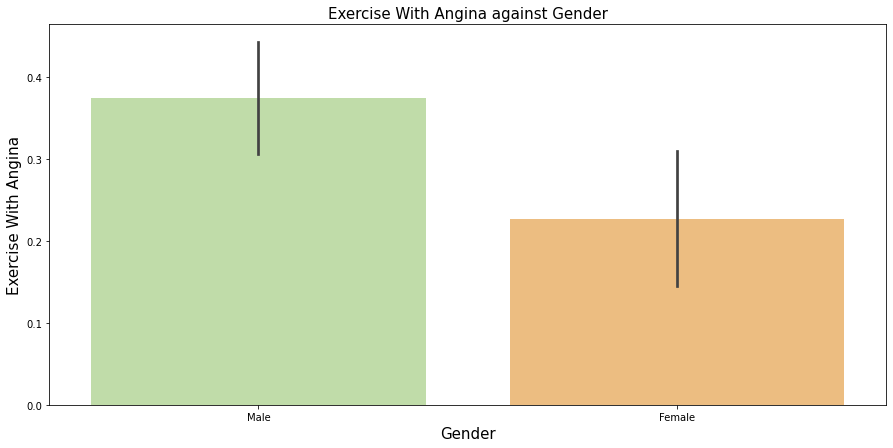

In [41]:
#Plot Creation of Exercise With Angina against Gender
plt.figure(figsize=(15,7))
sns.barplot( x='Gender',y='exang',data=Heart_Anlys_Df, palette='Spectral_r')
plt.title('Exercise With Angina against Gender', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

### From above we can conclude that  Males are prone to Excercise withAngna as compare to females.

In [43]:
Heart_Anlys_Df.to_excel('Modify_HeartDisease.xlsx')